# Support Vector Machine

For classfication of machine failure a support vector machine is used. 

The Python libraries that will be used inthe SVM application will be imported:

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.model_selection import GridSearchCV

The dataset is loaded and the unused data coloums are removed. df.head() is used to show the new dataset columns:

In [2]:
df = pd.read_csv('ai4i2020.csv')

df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In preparing the data for SVM classification, the the target feature is dropped from the x-axis and is made the y-axis.

In [3]:
# Separate features and target variable
X = df.drop(columns=['Machine failure'])    # Features
y = df['Machine failure']                   # Target variable

The features are scaled to normalize the feature values.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

To use the SVM classifier the dataset is split into a test and training set and is stratified due to the imbalance of machine failures

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

The SVM kernel used is the radial basis function and it is fitted to the training set

In [6]:
svm_model = SVC(kernel='rbf', random_state=42)  # Use 'linear' kernel for linear data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

Based on the SVM model a prediction is made against the testing set

In [7]:
y_pred = svm_model.predict(X_test)

The results of the prediction are shown

In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.83      0.22      0.35        68

    accuracy                           0.97      2000
   macro avg       0.90      0.61      0.67      2000
weighted avg       0.97      0.97      0.96      2000


Accuracy Score:
0.972


The confusion matrix is visualized

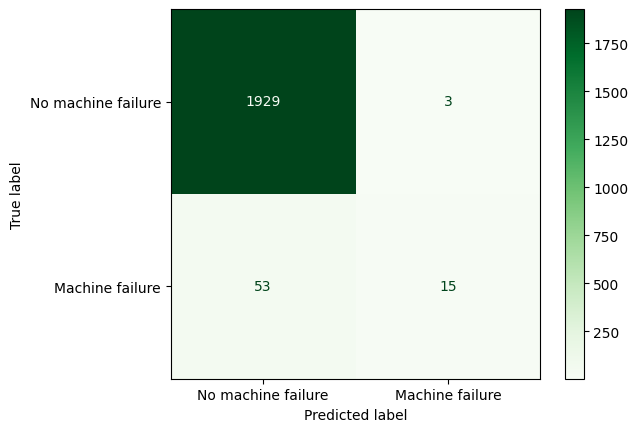

In [9]:
sns.reset_orig()
y_predicted = svm_model.predict(X_test) >= 1
labels = ['No machine failure','Machine failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Greens', xticks_rotation='horizontal')
plt.show()

# SVM grid search

To improve on the SVM model, a grid search is done using the same kernel. The gris search use different parameters which can be seen below.

In [10]:
param_grid = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.5, 0.25, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4, cv=15)
grid.fit(X_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits
[CV 1/15] END .........C=1, gamma=1, kernel=rbf;, score=0.979 total time=   0.1s
[CV 2/15] END .........C=1, gamma=1, kernel=rbf;, score=0.976 total time=   0.1s
[CV 3/15] END .........C=1, gamma=1, kernel=rbf;, score=0.968 total time=   0.1s
[CV 4/15] END .........C=1, gamma=1, kernel=rbf;, score=0.974 total time=   0.1s
[CV 5/15] END .........C=1, gamma=1, kernel=rbf;, score=0.972 total time=   0.2s
[CV 6/15] END .........C=1, gamma=1, kernel=rbf;, score=0.974 total time=   0.1s
[CV 7/15] END .........C=1, gamma=1, kernel=rbf;, score=0.972 total time=   0.2s
[CV 8/15] END .........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 9/15] END .........C=1, gamma=1, kernel=rbf;, score=0.979 total time=   0.1s
[CV 10/15] END ........C=1, gamma=1, kernel=rbf;, score=0.974 total time=   0.1s
[CV 11/15] END ........C=1, gamma=1, kernel=rbf;, score=0.968 total time=   0.2s
[CV 12/15] END ........C=1, gamma=1, kernel=rb

GridSearchCV(cv=15, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.5, 0.25, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=4)

The best parameters found are:

In [11]:
# Best Parameters
print("Best Parameters:", grid.best_params_)
print("Best cross-validation recall score:", grid.best_score_)

# Evaluate on test data
grid_predictions = grid.predict(X_test)
print("\nClassification Report After Tuning:")
print(classification_report(y_test, grid_predictions))

Best Parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation recall score: 0.9816235802807467

Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.81      0.65      0.72        68

    accuracy                           0.98      2000
   macro avg       0.90      0.82      0.86      2000
weighted avg       0.98      0.98      0.98      2000



The confusion matrix is visualized

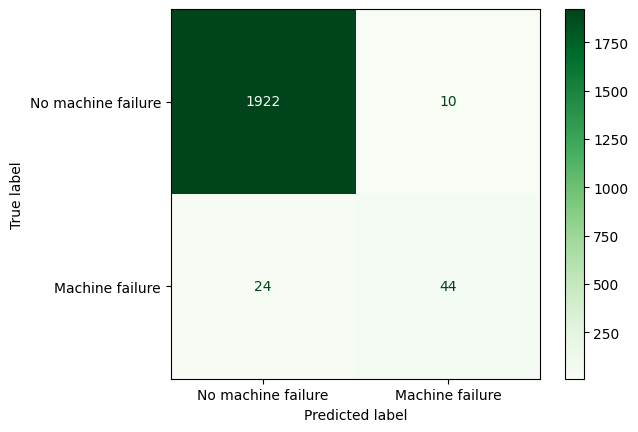

In [12]:
sns.reset_orig()
y_predicted = grid.predict(X_test) >= 1
labels = ['No machine failure','Machine failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Greens', xticks_rotation='horizontal')
plt.show()